In [1]:
#data handling/modeling
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.stats as stats

# visualization
%matplotlib inline
import seaborn as sns

In [4]:
vertebral_data=pd.read_csv('C:/Users/Madhumita.Ganesan/Desktop/DataScience/data/vertebral_column_2_categories.txt',sep=" ",names = ["pelvic_incidence","pelvic_tilt","lumbar_lordosis_angle","sacral_slope","pelvic_radius","spondy_grade","outcome"])
vertebral_data.outcome.value_counts()

AB    210
NO    100
Name: outcome, dtype: int64

Plotting Categorical Variables using Simple Linear Regression

In [6]:
vertebral_data["outcome_number"]= (vertebral_data.outcome == 'AB').astype(int)
vertebral_data.outcome_number.value_counts()

1    210
0    100
Name: outcome_number, dtype: int64

Intercept and coeff are : 0.09677171247257943   [0.00959804]


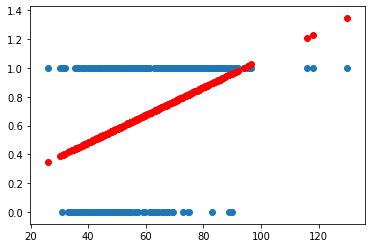

In [15]:
## Simple linear regression on categorical data
feature_cols='pelvic_incidence'
X=vertebral_data[feature_cols]
y=vertebral_data.outcome_number
linreg = LinearRegression()
linreg.fit(X.values.reshape(-1,1),y)

print("Intercept and coeff are :",linreg.intercept_," ",linreg.coef_)
y_pred=linreg.predict(X.values.reshape(-1,1))

sns.mpl.pyplot.scatter(vertebral_data.pelvic_incidence,vertebral_data.outcome_number)
sns.mpl.pyplot.scatter(vertebral_data.pelvic_incidence,y_pred,color='red')

In [17]:
y_pred[:10]

array([0.70173614, 0.47167114, 0.75740477, 0.76191585, 0.57389026,
       0.4830928 , 0.60959496, 0.53223477, 0.51706986, 0.44892378])

In [21]:
vertebral_data.pelvic_incidence.values.flatten()[:10]

array([63.03, 39.06, 68.83, 69.3 , 49.71, 40.25, 53.43, 45.37, 43.79,
       36.69])

In [26]:
y_pred_class=np.where(y_pred >= 0.5,1,0)
y_pred_class

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,

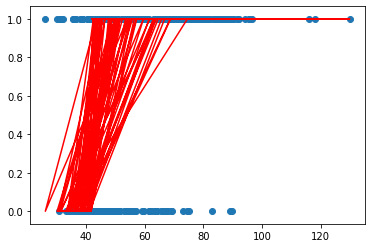

In [28]:
sns.mpl.pyplot.scatter(vertebral_data.pelvic_incidence, vertebral_data.outcome_number)
sns.mpl.pyplot.plot(vertebral_data.pelvic_incidence, y_pred_class, color='red')

In [30]:
# add predicted class to DataFrame
vertebral_data['y_pred_class'] = y_pred_class

# sort DataFrame by pelvic_incidence so that the line plot makes sense
vertebral_data.sort_values('pelvic_incidence', inplace=True)

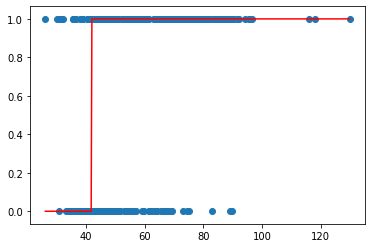

In [32]:
sns.mpl.pyplot.scatter(vertebral_data.pelvic_incidence, vertebral_data.outcome_number)
sns.mpl.pyplot.plot(vertebral_data.pelvic_incidence, vertebral_data.y_pred_class, color='red')

Using Logistic Regression for plotting Categorical Values

In [33]:
logreg=LogisticRegression(C=1e9,solver='lbfgs')
feature_cols=['pelvic_incidence']
X_log=vertebral_data[feature_cols]
y_log=vertebral_data.outcome_number
logreg.fit(X_log,y_log)
outcome_pred_class_log=logreg.predict(X_log)

In [34]:
outcome_pred_class_log

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

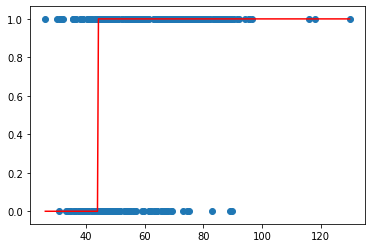

In [35]:
sns.mpl.pyplot.scatter(vertebral_data.pelvic_incidence, vertebral_data.outcome_number)
sns.mpl.pyplot.plot(vertebral_data.pelvic_incidence,outcome_pred_class_log,color='red')

In [40]:
## Predicted probabilites instead od just classes of prediction
outcome_prob=logreg.predict_proba(X_log)[:,1]

In [46]:
outcome_prob

array([0.27756036, 0.32267634, 0.32964905, 0.33549763, 0.33609732,
       0.33850131, 0.34588476, 0.3575319 , 0.36684819, 0.36747292,
       0.374248  , 0.37765431, 0.37904556, 0.38832789, 0.39101356,
       0.39332084, 0.39653328, 0.39691938, 0.4002709 , 0.40376123,
       0.4096    , 0.41729381, 0.41951834, 0.42148388, 0.4225332 ,
       0.42752683, 0.42950213, 0.43002926, 0.43478043, 0.43517692,
       0.43874895, 0.44272532, 0.4505665 , 0.45189806, 0.45269733,
       0.45469656, 0.456297  , 0.457231  , 0.46284114, 0.46310854,
       0.46524845, 0.46926419, 0.47033574, 0.47087162, 0.47422235,
       0.48093048, 0.48093048, 0.48630206, 0.48898911, 0.48992974,
       0.49006412, 0.49208   , 0.49328965, 0.49517149, 0.49705346,
       0.49799448, 0.49974213, 0.50377511, 0.50417839, 0.50511935,
       0.50565703, 0.50659793, 0.50740438, 0.507942  , 0.5082108 ,
       0.51304823, 0.51345125, 0.51533178, 0.51761469, 0.51922572,
       0.5201653 , 0.52150732, 0.52204404, 0.52365389, 0.53089

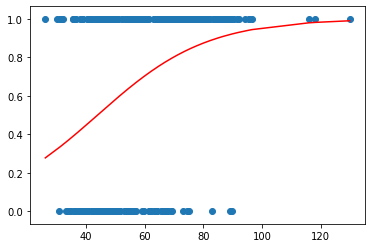

In [47]:
sns.mpl.pyplot.scatter(vertebral_data.pelvic_incidence, vertebral_data.outcome_number)
sns.mpl.pyplot.plot(vertebral_data.pelvic_incidence,outcome_prob,color='red')

In [56]:
## Examples of predictions and probalbility of predictions

print("Pelvic incident predict class ",logreg.predict([[15]]))

print("Pelvic incident predict class ",logreg.predict_proba([[15]]))
## First number indicates the probability of class 0, and second number indicates the probability of class 1

Pelvic incident predict class  [0]
Pelvic incident predict class  [[0.82580388 0.17419612]]


In [63]:
##Logistic Regression of all columns to predict outcome classes

feature_cols = vertebral_data.columns[:-3]
X_all=vertebral_data[feature_cols]
y_all=vertebral_data.outcome_number

logreg_all=LogisticRegression(C=1e9,solver='lbfgs')
logreg_all.fit(X_all,y_all)
outcome_all = logreg_all.predict(X_all)

metrics.accuracy_score(y_all,outcome_all)

0.8580645161290322

In [64]:
X_train,X_test,Y_train,Y_test=train_test_split(X_all,y_all,test_size=0.3,random_state=1)

In [65]:
logreg_tt=LogisticRegression(C=1e9,solver='lbfgs')
logreg_tt.fit(X_train,Y_train)
outcome_train = logreg_tt.predict(X_train)
metrics.accuracy_score(Y_train,outcome_train)

0.8571428571428571

In [67]:
outcome_test = logreg_tt.predict(X_test)
metrics.accuracy_score(Y_test,outcome_test)

0.8279569892473119